# Creating a simple Logit Regression Model to test with our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load in the training data

In [3]:
#data = pd.read_csv("/content/drive/MyDrive/01-Classes/08Semester/CSDS491/CSDS491CourseProject/data/train.csv") #Sakin's directory
data = pd.read_csv("/content/drive/MyDrive/Case/Graph Class/train.csv") #Josh's directory
#data = pd.read_csv("train.csv")
data.head()

,Unnamed: 0,MassScore,VolumeScore,Area2D,NumLesion3D,isAgZero,isLesion3DBelow5,AgGroupX1,AgGroupX2,AgGroupX3,...,female,smokingstatus,Baseline.BMI,IBD,SLE,Psoriasis,RA,BASELINE_DM,DM,Status
0,0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,33.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11.391991,95.593929,38.623810,12.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,36.50,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,2,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,30.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,21.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,14.425980,76.675415,30.975342,3.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,33.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(3366, 75)

check columns

In [5]:
data.columns

Index(['Unnamed: 0', 'MassScore', 'VolumeScore', 'Area2D', 'NumLesion3D',
       'isAgZero', 'isLesion3DBelow5', 'AgGroupX1', 'AgGroupX2', 'AgGroupX3',
       'numLesionPerArtery3D_LM1', 'numLesionPerArtery3D_LAD1',
       'numLesionPerArtery3D_LCX1', 'numLesionPerArtery3D_RCA1', 'isArt2plus',
       'isArt3plus', 'numArtCalc', 'AgastonScorePerArtery2D_LM1',
       'AgastonScorePerArtery2D_LAD1', 'AgastonScorePerArtery2D_LCX1',
       'AgastonScorePerArtery2D_RCA1', 'MassScorePerArtery_LM1',
       'MassScorePerArtery_LAD1', 'MassScorePerArtery_LCX1',
       'MassScorePerArtery_RCA1', 'VolumeScorePerArtery_LM1',
       'VolumeScorePerArtery_LAD1', 'VolumeScorePerArtery_LCX1',
       'VolumeScorePerArtery_RCA1', 'massHist1', 'massHist2', 'massHist3',
       'massHist4', 'massHist5', 'avrHist1', 'avrHist2', 'avrHist3',
       'avrHist4', 'avrHist5', 'DistTop2LastLesionPerArtery_LM1',
       'DistTop2LastLesionPerArtery_LAD1', 'DistTop2LastLesionPerArtery_LCX1',
       'DistTop2LastLesion

recursive feature elimination to get the best features

In [6]:
# isolate variable names
vars = data.columns.values.tolist()
y = ["Status"]
x = [var for var in vars if var not in y]

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [8]:
# initalize the logreg
logreg = LogisticRegression()

# perform recursive feature elimination -> gives 20 best features
import warnings
selector = RFE(estimator=logreg, n_features_to_select=20, step=1)
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  selector = selector.fit(data[x], data["Status"].values.ravel())

# print some metrics
print(selector.support_)
print(selector.ranking_)

[False  True False False False  True  True False False False False False
  True False False False False False False False  True False False  True
  True False False  True  True False False False False False False False
 False False False False  True False False  True  True False False  True
  True False False False False  True  True False False False False False
 False False False False False False  True  True False False False False
  True  True]
[11  1 15 12 33  1  1 13 24 51 19 26  1 17 46 22 41 31 28 27  1  3  4  1
  1 37 10  1  1 40 29 39 49 48 38 47 55 53 45  9  1  2 25  1  1  8 14  1
  1 44 35 34 42  1  1 16  6  5 36 21 23 32 18 30  7 20  1  1 43 54 52 50
  1  1]


In [9]:
# separate X and Y
X = data[x]
Y = data[y]

take the "true" variables to use in the model

In [10]:
# get the variables to use in the model
vars_model = [x[i] for i in range(len(x)) if selector.support_[i] == True]
vars_model

['MassScore',
 'isAgZero',
 'isLesion3DBelow5',
 'numLesionPerArtery3D_LCX1',
 'AgastonScorePerArtery2D_RCA1',
 'MassScorePerArtery_LCX1',
 'MassScorePerArtery_RCA1',
 'VolumeScorePerArtery_LCX1',
 'VolumeScorePerArtery_RCA1',
 'DistTop2LastLesionPerArtery_LAD1',
 'DistFirst2LastLesionPerArtery_LM1',
 'DistFirst2LastLesionPerArtery_LAD1',
 'ICfirstMomentH1',
 'ICfirstMomentH2',
 'ICmeanMomentH1',
 'ICmeanMomentH2',
 'smokingstatus',
 'Baseline.BMI',
 'BASELINE_DM',
 'DM']

In [11]:
X_rfe = X[vars_model]
X_rfe.head()

,MassScore,isAgZero,isLesion3DBelow5,numLesionPerArtery3D_LCX1,AgastonScorePerArtery2D_RCA1,MassScorePerArtery_LCX1,MassScorePerArtery_RCA1,VolumeScorePerArtery_LCX1,VolumeScorePerArtery_RCA1,DistTop2LastLesionPerArtery_LAD1,DistFirst2LastLesionPerArtery_LM1,DistFirst2LastLesionPerArtery_LAD1,ICfirstMomentH1,ICfirstMomentH2,ICmeanMomentH1,ICmeanMomentH2,smokingstatus,Baseline.BMI,BASELINE_DM,DM
0,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,33.43,0.0,0.0
1,11.391991,0.0,0.0,3.0,7.402897,4.889639,1.580527,40.555000,14.966726,114.11689,0.0,52.267609,115.861703,115.776216,7.613679,7.235665,1.0,36.50,1.0,1.0
2,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,30.35,0.0,0.0
3,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,21.32,0.0,0.0
4,14.425980,0.0,1.0,1.0,0.000000,1.334207,0.000000,9.918213,0.000000,52.25405,0.0,10.025202,136.384556,122.100644,10.989191,7.625796,1.0,33.76,0.0,0.0


Prep a logistic regression model

In [12]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_rfe, Y["Status"].values)

LogisticRegression(max_iter=100000)

Load in the testing dataset to test the model

In [14]:
#test_XY = pd.read_csv("/content/drive/MyDrive/01-Classes/08Semester/CSDS491/CSDS491CourseProject/data/test.csv") #Sakin's directory
test_XY = pd.read_csv("/content/drive/MyDrive/Case/Graph Class/test.csv") #Josh's directory
#test_XY = pd.read_csv("test.csv")

X_test = test_XY[vars_model]
Y_test = test_XY["Status"]

X_test.head()

,MassScore,isAgZero,isLesion3DBelow5,numLesionPerArtery3D_LCX1,AgastonScorePerArtery2D_RCA1,MassScorePerArtery_LCX1,MassScorePerArtery_RCA1,VolumeScorePerArtery_LCX1,VolumeScorePerArtery_RCA1,DistTop2LastLesionPerArtery_LAD1,DistFirst2LastLesionPerArtery_LM1,DistFirst2LastLesionPerArtery_LAD1,ICfirstMomentH1,ICfirstMomentH2,ICmeanMomentH1,ICmeanMomentH2,smokingstatus,Baseline.BMI,BASELINE_DM,DM
0,10.236033,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,96.610364,0.0,49.271327,119.773253,112.350572,10.422298,6.366646,1.0,29.840,0.0,0.0
1,122.015518,0.0,0.0,6.0,444.253286,20.020468,59.528936,141.263008,414.252281,170.721832,0.0,100.884976,182.173447,179.346029,36.478531,16.260481,0.0,31.940,0.0,0.0
2,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,29.935,0.0,0.0
3,6.859407,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,74.684690,0.0,8.992051,126.160607,121.594028,10.168400,10.325943,0.0,21.620,0.0,0.0
4,36.141647,0.0,1.0,3.0,0.000000,17.422057,0.000000,99.563599,0.000000,53.587287,0.0,11.426424,127.025006,140.485687,9.589599,11.450234,0.0,25.557,0.0,0.0


In [15]:
y_pred = logreg.predict(X_test)
print(f"Accuracy Score: {logreg.score(X_test, Y_test)}")

Accuracy Score: 0.6971544715447154


Accuracy score is not too great, let's check the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[297 138]
 [ 11  46]]


Okay, so this means there were 295+30 correct predictions and 27+140 incorrect predictions

We can build the ROC curve to see how good our classifier is. A straight line from the bottom left to top right would be random while a curve that nears the top left would be good

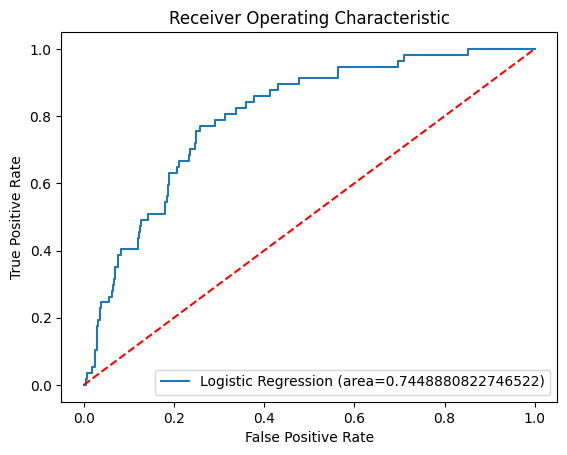

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fp, tp, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fp, tp, label=f"Logistic Regression (area={logit_roc_auc})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

Our ROC curve demonstrates that this logistic regression model does not do the greatest job of distinguishing between whether an individual has died or is still alive based on the features that were included. Potential ways to improve might include performing extensive data cleaning.

In [18]:
# plot the maximum of the best number of features
plt.plot(np.arange(1, len(data.columns)), exploration)
plt.xlabel("Number of features")
plt.ylabel("logit ROC AUC")
plt.title("Number of Features for Logistic Regression Fit")
plt.show()

NameError: ignored

## Logistic Regression Kaplan-Meier Curve

In [19]:
preds_df = pd.DataFrame()
preds_df["labels"] = Y_test.values
preds_df["preds"] = y_pred
preds_df["time"] = (test_XY["Time"] / 30).astype(int)

preds_df.head()

,labels,preds,time
0,0.0,1.0,10
1,0.0,0.0,18
2,0.0,0.0,7
3,0.0,0.0,50
4,0.0,0.0,9


In [20]:
summarized = pd.DataFrame(preds_df.groupby("time").describe()["preds"])
summarized.head()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
1,16.0,0.375000,0.500000,0.0,0.0,0.0,1.0,1.0
2,21.0,0.428571,0.507093,0.0,0.0,0.0,1.0,1.0
3,24.0,0.458333,0.508977,0.0,0.0,0.0,1.0,1.0
4,11.0,0.363636,0.504525,0.0,0.0,0.0,1.0,1.0
5,17.0,0.588235,0.507300,0.0,0.0,1.0,1.0,1.0


In [21]:
summarized.to_csv("summarized_lr.csv")
summarized = pd.read_csv("summarized_lr.csv")
summarized.head()

,time,count,mean,std,min,25%,50%,75%,max
0,1,16.0,0.375000,0.500000,0.0,0.0,0.0,1.0,1.0
1,2,21.0,0.428571,0.507093,0.0,0.0,0.0,1.0,1.0
2,3,24.0,0.458333,0.508977,0.0,0.0,0.0,1.0,1.0
3,4,11.0,0.363636,0.504525,0.0,0.0,0.0,1.0,1.0
4,5,17.0,0.588235,0.507300,0.0,0.0,1.0,1.0,1.0


now, create the plots

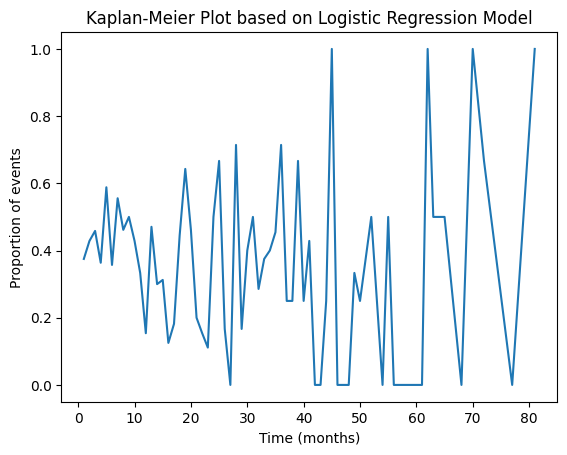

In [22]:
plt.plot(summarized["time"], summarized["mean"])
plt.ylim(-0.05, 1.05)
plt.title("Kaplan-Meier Plot based on Logistic Regression Model")
plt.xlabel("Time (months)")
plt.ylabel("Proportion of events")
plt.show()

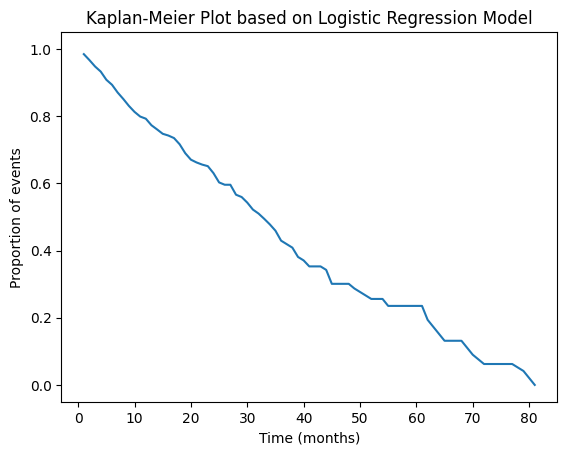

In [23]:
plt.plot(summarized["time"], 1-np.cumsum(summarized["mean"]) / np.sum(summarized["mean"]))
plt.ylim(-0.05, 1.05)
plt.title("Kaplan-Meier Plot based on Logistic Regression Model")
plt.xlabel("Time (months)")
plt.ylabel("Proportion of events")
plt.show()

Addin in the Kaplan Meier Analysis of the Model

In [24]:
!pip install lifelines
import lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
